In [54]:
%matplotlib inline

import pandas as pd
import seaborn as sbn
import numpy as np
sbn.set()
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 


In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
# Read in the CSV
BI = pd.DataFrame.from_csv('../../Data/body_image.csv', index_col=None, encoding = "ISO-8859-1")

In [4]:
BI.head(10)

,Gender,Height,GPA,HS_GPA,Seat,WtFeel,Cheat
0,Female,64,2.60,2.63,M,AboutRt,No
1,Male,69,2.70,3.72,M,AboutRt,No
2,Female,66,3.00,3.44,F,AboutRt,No
3,Female,63,3.11,2.73,F,AboutRt,No
4,Male,72,3.40,2.35,B,OverWt,No
5,Female,67,3.43,3.84,M,AboutRt,No
6,Male,69,3.70,4.00,F,AboutRt,No
7,Male,74,3.70,3.92,B,AboutRt,No
8,Male,72,3.77,3.09,M,UnderWt,No
9,Female,63,3.50,4.00,F,AboutRt,No


In [5]:
seats = []

for idx, row in BI.iterrows():
    if row["Seat"] == "B":
        seats.append(0)
    elif row["Seat"] == "M":
        seats.append(.5)
    else:
        seats.append(1)
        
BI["SeatNum"] = seats

In [6]:
wtFeels = []

for idx, row in BI.iterrows():
    if row["WtFeel"] == "AboutRt":
        wtFeels.append(0)
    elif row["WtFeel"] == "OverWt":
        wtFeels.append(1)
    else:
        wtFeels.append(-1)
        
BI["WtFeelNum"] = wtFeels

In [7]:
genders = []

for idx, row in BI.iterrows():
    if row["Gender"] == "Male":
        genders.append(1)
    else:
        genders.append(0)
        
BI["GenderNum"] = genders

In [8]:
cheats = []

for idx, row in BI.iterrows():
    if row["Cheat"] == "Yes":
        cheats.append(1)
    else:
        cheats.append(0)
        
BI["CheatNum"] = cheats

In [9]:
BI.head(20)

,Gender,Height,GPA,HS_GPA,Seat,WtFeel,Cheat,SeatNum,WtFeelNum,GenderNum,CheatNum
0,Female,64.0,2.60,2.63,M,AboutRt,No,0.5,0,0,0
1,Male,69.0,2.70,3.72,M,AboutRt,No,0.5,0,1,0
2,Female,66.0,3.00,3.44,F,AboutRt,No,1.0,0,0,0
3,Female,63.0,3.11,2.73,F,AboutRt,No,1.0,0,0,0
4,Male,72.0,3.40,2.35,B,OverWt,No,0.0,1,1,0
5,Female,67.0,3.43,3.84,M,AboutRt,No,0.5,0,0,0
6,Male,69.0,3.70,4.00,F,AboutRt,No,1.0,0,1,0
7,Male,74.0,3.70,3.92,B,AboutRt,No,0.0,0,1,0
8,Male,72.0,3.77,3.09,M,UnderWt,No,0.5,-1,1,0
9,Female,63.0,3.50,4.00,F,AboutRt,No,1.0,0,0,0


# Predicting if a peron will cheat
## Based on:
* Gender
* Height
* College GPA
* HS GPA
* Where they sit in class
* How they feel about their weight

# SVC

In [58]:
data = BI.as_matrix(columns=["GenderNum","Height","GPA","HS_GPA","SeatNum","WtFeelNum"])
target = BI.as_matrix(columns=["CheatNum"])


In [59]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, test_size = 0.3)

In [60]:
cls = SVC()
cls.fit(Xtrain, ytrain.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [61]:
result = cls.predict([[1,71,3.8,3.67,1,1]])
print(result)

[0]


In [62]:
ypred = cls.predict(Xtest)
print(classification_report(ytest, ypred))

             precision    recall  f1-score   support

          0       0.90      1.00      0.95        62
          1       0.00      0.00      0.00         7

avg / total       0.81      0.90      0.85        69



/Users/schabl01/.virtualenvs/Jupyter/lib/python3.4/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[62  0]
 [ 7  0]]


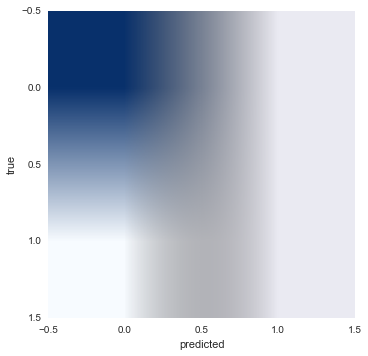

In [63]:
print(confusion_matrix(ytest, ypred))
plt.imshow(np.log(confusion_matrix(ytest, ypred)), cmap="Blues")
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted')

# Perceptron

In [64]:
data = BI.as_matrix(columns=["GenderNum","Height","GPA","HS_GPA","SeatNum","WtFeelNum"])
target = BI.as_matrix(columns=["CheatNum"])

Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, test_size = 0.3)

cls = Perceptron()
cls.fit(Xtrain, ytrain.ravel())

result = cls.predict([[1,71,3.8,3.67,1,1]])
print(result)

[0]


In [65]:
ypred = cls.predict(Xtest)
print(classification_report(ytest, ypred))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98        66
          1       0.00      0.00      0.00         3

avg / total       0.91      0.96      0.94        69



/Users/schabl01/.virtualenvs/Jupyter/lib/python3.4/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[66  0]
 [ 3  0]]


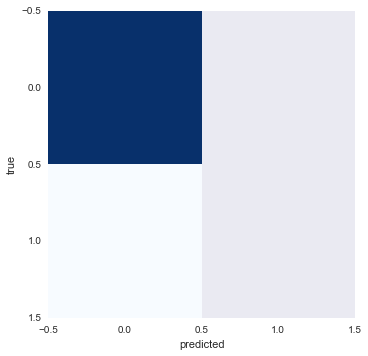

In [66]:
print(confusion_matrix(ytest, ypred))
plt.imshow(np.log(confusion_matrix(ytest, ypred)), cmap="Blues", interpolation = "nearest")
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted')

[[66  0]
 [ 3  0]]


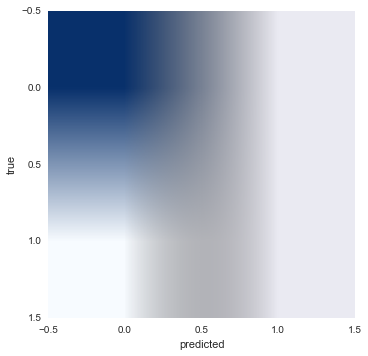

In [67]:
print(confusion_matrix(ytest, ypred))
plt.imshow(np.log(confusion_matrix(ytest, ypred)), cmap="Blues")
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted')

# Linear Regression

In [70]:
data = BI.as_matrix(columns=["GenderNum","Height","GPA","HS_GPA","SeatNum","WtFeelNum"])
target = BI.as_matrix(columns=["CheatNum"])

Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, test_size = 0.3)

cls = LinearRegression()
cls.fit(Xtrain, ytrain.ravel())

result = cls.predict([[1,71,3.8,3.67,1,1]])
print(result)

[ 0.16664884]


In [71]:
print (cls.score(Xtest,ytest))

0.00577127947031


In [72]:
print(cls.coef_,cls.intercept_)

[-0.0299635  -0.00174542  0.09881529 -0.02355758  0.09066535  0.02240086] -0.08157083377


[[63  0]
 [ 6  0]]


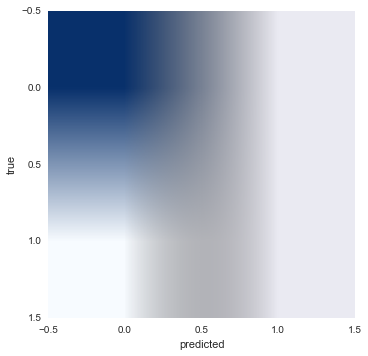

In [73]:
print(confusion_matrix(ytest, ypred))
plt.imshow(np.log(confusion_matrix(ytest, ypred)), cmap="Blues")
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted')

# Decision Tree

In [78]:
data = BI.as_matrix(columns=["GenderNum","Height","GPA","HS_GPA","SeatNum","WtFeelNum"])
target = BI.as_matrix(columns=["CheatNum"])

Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, test_size = 0.3)

cls = DecisionTreeClassifier()
cls.fit(Xtrain, ytrain.ravel())

result = cls.predict([[1,71,3.8,3.67,1,1]])
print(result)

[0]


In [79]:
ypred = cls.predict(Xtest)
print(classification_report(ytest, ypred))

             precision    recall  f1-score   support

          0       1.00      0.82      0.90        68
          1       0.08      1.00      0.14         1

avg / total       0.99      0.83      0.89        69



[[56 12]
 [ 0  1]]


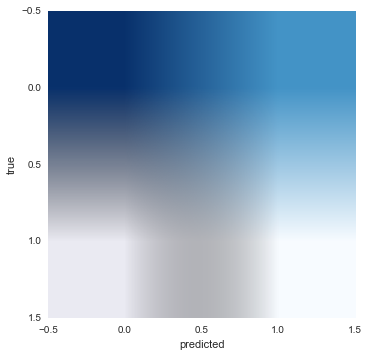

In [80]:
print(confusion_matrix(ytest, ypred))
plt.imshow(np.log(confusion_matrix(ytest, ypred)), cmap="Blues")
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted')

[[56 12]
 [ 0  1]]


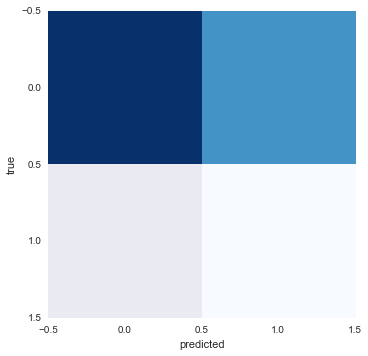

In [81]:
print(confusion_matrix(ytest, ypred))
plt.imshow(np.log(confusion_matrix(ytest, ypred)), cmap="Blues", interpolation="nearest")
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted')

# Random Forest

In [90]:
data = BI.as_matrix(columns=["GenderNum","Height","GPA","HS_GPA","SeatNum","WtFeelNum"])
target = BI.as_matrix(columns=["CheatNum"])

Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, test_size = 0.3)

cls = RandomForestClassifier()
cls.fit(Xtrain, ytrain.ravel())

result = cls.predict([[1,71,3.8,3.67,1,1]])
print(result)

[0]


In [91]:
ypred = cls.predict(Xtest)
print(classification_report(ytest, ypred))

             precision    recall  f1-score   support

          0       0.97      0.92      0.94        65
          1       0.29      0.50      0.36         4

avg / total       0.93      0.90      0.91        69



[[60  5]
 [ 2  2]]


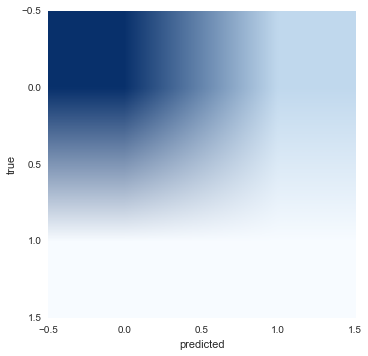

In [92]:
print(confusion_matrix(ytest, ypred))
plt.imshow(np.log(confusion_matrix(ytest, ypred)), cmap="Blues")
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted')

[[60  5]
 [ 2  2]]


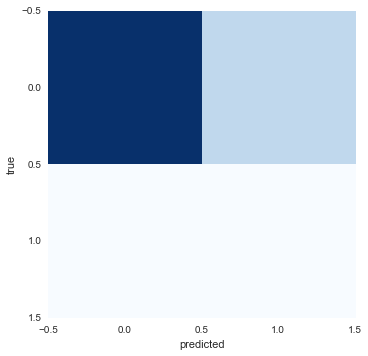

In [93]:
print(confusion_matrix(ytest, ypred))
plt.imshow(np.log(confusion_matrix(ytest, ypred)), cmap="Blues", interpolation="nearest")
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted')

In [24]:
# for base in range(1,4):
#     for point in range(10):
#         GPA = float(str(base) + "." + str(point))
#         for base2 in range(1,4):
#             for point2 in range(10):
#                 HSGPA = float(str(base2) + "." + str(point2))
#                 for height in range(55,81):
#                     for seat in range(3):
#                         seatNum = seat/2
#                         for wtFeel in range(-1,2,1):
#                             for gender in range(2):
#                                 res = cls.predict([gender, height, GPA, HSGPA, seatNum, wtFeel])
#                                 print(gender, height, GPA, HSGPA, seatNum, wtFeel, res)
                

# Predicting male or female
## Based on:
* College GPA
* HS GPA
* Where they sit in class

# SVC

In [118]:
data = BI.as_matrix(columns=["GPA","HS_GPA","SeatNum"])
target = BI.as_matrix(columns=["GenderNum"])

Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, test_size = 0.3)

cls = SVC()
cls.fit(Xtrain, ytrain.ravel())

result = cls.predict([[3.8, 3.6, 1]])
print(result)

[0]


In [119]:
ypred = cls.predict(Xtest)
print(classification_report(ytest, ypred))

             precision    recall  f1-score   support

          0       0.73      0.98      0.84        48
          1       0.80      0.19      0.31        21

avg / total       0.75      0.74      0.68        69



[[47  1]
 [17  4]]


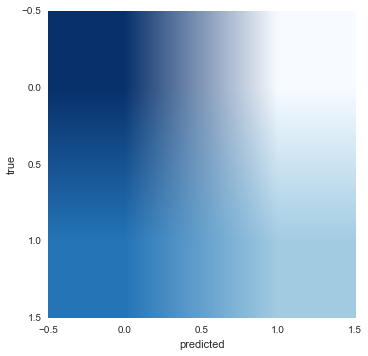

In [120]:
print(confusion_matrix(ytest, ypred))
plt.imshow(np.log(confusion_matrix(ytest, ypred)), cmap="Blues")
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted')

[[47  1]
 [17  4]]


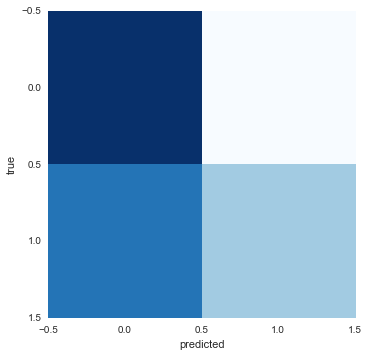

In [123]:
print(confusion_matrix(ytest, ypred))
plt.imshow(np.log(confusion_matrix(ytest, ypred)), cmap="Blues", interpolation="nearest")
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted')

# Perceptron

In [134]:
data = BI.as_matrix(columns=["GPA","HS_GPA","SeatNum"])
target = BI.as_matrix(columns=["GenderNum"])

Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, test_size = 0.3)

cls = Perceptron()
cls.fit(Xtrain, ytrain.ravel())

result = cls.predict([[3.8, 3.6, 1]])
print(result)

[0]


In [135]:
ypred = cls.predict(Xtest)
print(classification_report(ytest, ypred))

             precision    recall  f1-score   support

          0       0.65      1.00      0.79        44
          1       1.00      0.04      0.08        25

avg / total       0.77      0.65      0.53        69



[[44  0]
 [24  1]]


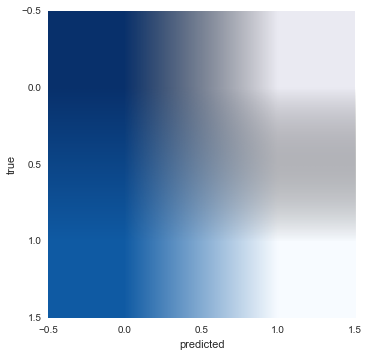

In [136]:
print(confusion_matrix(ytest, ypred))
plt.imshow(np.log(confusion_matrix(ytest, ypred)), cmap="Blues")
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted')

# Linear Regression

In [141]:
data = BI.as_matrix(columns=["GPA","HS_GPA","SeatNum"])
target = BI.as_matrix(columns=["GenderNum"])

Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, test_size = 0.3)

cls = LinearRegression()
cls.fit(Xtrain, ytrain.ravel())

result = cls.predict([[3.8, 3.6, 1]])
print(result)

[ 0.22037622]


In [142]:
print (cls.score(Xtest,ytest))
print(cls.coef_,cls.intercept_)

-0.0131254923787
[-0.12703723 -0.02963116 -0.11107471] 0.920864585104


[[43  1]
 [25  0]]


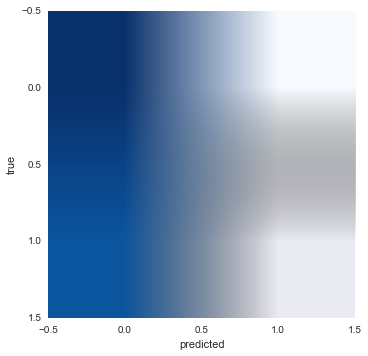

In [143]:
print(confusion_matrix(ytest, ypred))
plt.imshow(np.log(confusion_matrix(ytest, ypred)), cmap="Blues")
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted')

# Decison Tree

In [156]:
data = BI.as_matrix(columns=["GPA","HS_GPA","SeatNum"])
target = BI.as_matrix(columns=["GenderNum"])

Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, test_size = 0.3)

cls = DecisionTreeClassifier()
cls.fit(Xtrain, ytrain.ravel())

result = cls.predict([[3.8, 3.6, 1]])
print(result)

[1]


In [157]:
ypred = cls.predict(Xtest)
print(classification_report(ytest, ypred))

             precision    recall  f1-score   support

          0       0.68      0.71      0.70        45
          1       0.41      0.38      0.39        24

avg / total       0.59      0.59      0.59        69



[[32 13]
 [15  9]]


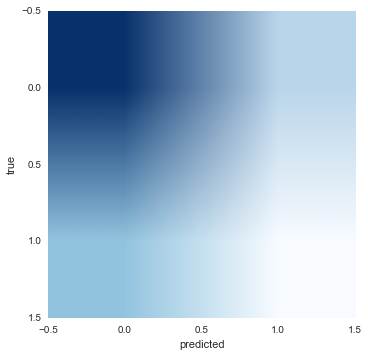

In [158]:
print(confusion_matrix(ytest, ypred))
plt.imshow(np.log(confusion_matrix(ytest, ypred)), cmap="Blues")
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted')

# Random Forest

In [165]:
data = BI.as_matrix(columns=["GPA","HS_GPA","SeatNum"])
target = BI.as_matrix(columns=["GenderNum"])

Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, test_size = 0.3)

cls = RandomForestClassifier()
cls.fit(Xtrain, ytrain.ravel())

result = cls.predict([[3.8, 3.6, 1]])
print(result)

[1]


In [166]:
ypred = cls.predict(Xtest)
print(classification_report(ytest, ypred))

             precision    recall  f1-score   support

          0       0.71      0.69      0.70        51
          1       0.20      0.22      0.21        18

avg / total       0.58      0.57      0.57        69



[[35 16]
 [14  4]]


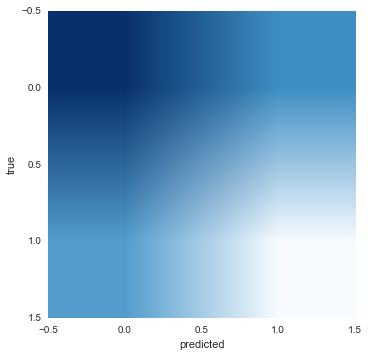

In [167]:
print(confusion_matrix(ytest, ypred))
plt.imshow(np.log(confusion_matrix(ytest, ypred)), cmap="Blues")
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted')

# Predicting male or female
## Based on:
* College GPA
* How they feel about their weight
* Where they sit in class

# SVC

In [174]:
data = BI.as_matrix(columns=["GPA","WtFeelNum","SeatNum"])
target = BI.as_matrix(columns=["GenderNum"])

Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, test_size = 0.3)

cls = SVC()
cls.fit(Xtrain, ytrain.ravel())

result = cls.predict([[3.8, 0, 1]])
print(result)

[0]


In [175]:
ypred = cls.predict(Xtest)
print(classification_report(ytest, ypred))

             precision    recall  f1-score   support

          0       0.81      1.00      0.89        51
          1       1.00      0.33      0.50        18

avg / total       0.86      0.83      0.79        69



[[51  0]
 [12  6]]


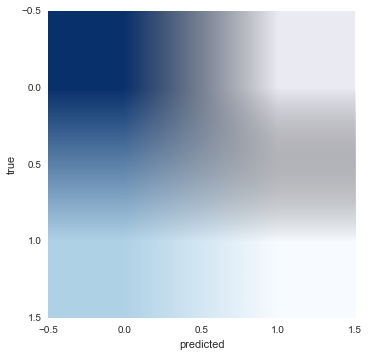

In [176]:
print(confusion_matrix(ytest, ypred))
plt.imshow(np.log(confusion_matrix(ytest, ypred)), cmap="Blues")
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted')

In [177]:
for base in range(0,4,1):
    for point in range(10):
        GPA =  float(str(base) + "." + str(point))
        for seat in range(3):
            seatNum = (seat/2)
            for wtFeel in range(-1,2,1):
                res = cls.predict([GPA, wtFeel, seatNum])
                print(GPA, wtFeel, seatNum, res)

0.0 -1 0.0 [1]
0.0 0 0.0 [1]
0.0 1 0.0 [1]
0.0 -1 0.5 [1]
0.0 0 0.5 [1]
0.0 1 0.5 [1]
0.0 -1 1.0 [1]
0.0 0 1.0 [1]
0.0 1 1.0 [1]
0.1 -1 0.0 [1]
0.1 0 0.0 [1]
0.1 1 0.0 [1]
0.1 -1 0.5 [1]
0.1 0 0.5 [1]
0.1 1 0.5 [1]
0.1 -1 1.0 [1]
0.1 0 1.0 [1]
0.1 1 1.0 [1]
0.2 -1 0.0 [1]
0.2 0 0.0 [1]
0.2 1 0.0 [1]
0.2 -1 0.5 [1]
0.2 0 0.5 [1]
0.2 1 0.5 [1]
0.2 -1 1.0 [1]
0.2 0 1.0 [1]
0.2 1 1.0 [1]
0.3 -1 0.0 [1]
0.3 0 0.0 [1]
0.3 1 0.0 [1]
0.3 -1 0.5 [1]
0.3 0 0.5 [1]
0.3 1 0.5 [1]
0.3 -1 1.0 [1]
0.3 0 1.0 [1]
0.3 1 1.0 [1]
0.4 -1 0.0 [1]
0.4 0 0.0 [1]
0.4 1 0.0 [1]
0.4 -1 0.5 [1]
0.4 0 0.5 [1]
0.4 1 0.5 [1]
0.4 -1 1.0 [1]
0.4 0 1.0 [1]
0.4 1 1.0 [1]
0.5 -1 0.0 [1]
0.5 0 0.0 [1]
0.5 1 0.0 [1]
0.5 -1 0.5 [1]
0.5 0 0.5 [1]
0.5 1 0.5 [1]
0.5 -1 1.0 [1]
0.5 0 1.0 [1]
0.5 1 1.0 [1]
0.6 -1 0.0 [1]
0.6 0 0.0 [1]
0.6 1 0.0 [1]
0.6 -1 0.5 [1]
0.6 0 0.5 [1]
0.6 1 0.5 [1]
0.6 -1 1.0 [1]
0.6 0 1.0 [1]
0.6 1 1.0 [1]
0.7 -1 0.0 [1]
0.7 0 0.0 [1]
0.7 1 0.0 [1]
0.7 -1 0.5 [1]
0.7 0 0.5 [1]
0.7 1 0.5 [1]
0.7 -1 1.0 

# Perceptron

In [200]:
data = BI.as_matrix(columns=["GPA","WtFeelNum","SeatNum"])
target = BI.as_matrix(columns=["GenderNum"])

Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, test_size = 0.3)

cls = Perceptron()
cls.fit(Xtrain, ytrain.ravel())

result = cls.predict([[3.8, 0, 1]])
print(result)

[0]


In [201]:
ypred = cls.predict(Xtest)
print(classification_report(ytest, ypred))

             precision    recall  f1-score   support

          0       0.63      0.93      0.75        42
          1       0.57      0.15      0.24        27

avg / total       0.61      0.62      0.55        69



[[39  3]
 [23  4]]


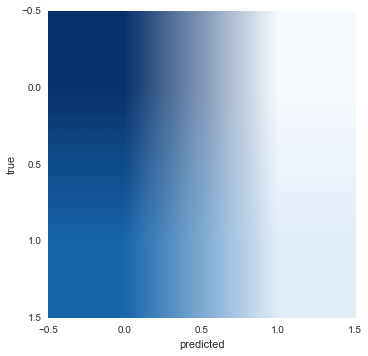

In [202]:
print(confusion_matrix(ytest, ypred))
plt.imshow(np.log(confusion_matrix(ytest, ypred)), cmap="Blues")
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted')

# Linear Regression

In [204]:
data = BI.as_matrix(columns=["GPA","WtFeelNum","SeatNum"])
target = BI.as_matrix(columns=["GenderNum"])

Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, test_size = 0.3)

cls = LinearRegression()
cls.fit(Xtrain, ytrain.ravel())

result = cls.predict([[3.8, 0, 1]])
print(result)

[ 0.20853868]


In [205]:
print (cls.score(Xtest,ytest))
print(cls.coef_,cls.intercept_)

0.0074747392982
[-0.12807537 -0.14437494 -0.22816654] 0.923391626312


In [206]:
for base in range(0,4,1):
    for point in range(10):
        GPA =  float(str(base) + "." + str(point))
        for seat in range(3):
            seatNum = (seat/2)
            for wtFeel in range(-1,2,1):
                res = cls.predict([GPA, wtFeel, seatNum])
                print(GPA, wtFeel, seatNum, res)

0.0 -1 0.0 [ 1.06776656]
0.0 0 0.0 [ 0.92339163]
0.0 1 0.0 [ 0.77901669]
0.0 -1 0.5 [ 0.95368329]
0.0 0 0.5 [ 0.80930835]
0.0 1 0.5 [ 0.66493342]
0.0 -1 1.0 [ 0.83960002]
0.0 0 1.0 [ 0.69522508]
0.0 1 1.0 [ 0.55085015]
0.1 -1 0.0 [ 1.05495903]
0.1 0 0.0 [ 0.91058409]
0.1 1 0.0 [ 0.76620915]
0.1 -1 0.5 [ 0.94087575]
0.1 0 0.5 [ 0.79650082]
0.1 1 0.5 [ 0.65212588]
0.1 -1 1.0 [ 0.82679248]
0.1 0 1.0 [ 0.68241755]
0.1 1 1.0 [ 0.53804261]
0.2 -1 0.0 [ 1.04215149]
0.2 0 0.0 [ 0.89777655]
0.2 1 0.0 [ 0.75340162]
0.2 -1 0.5 [ 0.92806822]
0.2 0 0.5 [ 0.78369328]
0.2 1 0.5 [ 0.63931834]
0.2 -1 1.0 [ 0.81398495]
0.2 0 1.0 [ 0.66961001]
0.2 1 1.0 [ 0.52523507]
0.3 -1 0.0 [ 1.02934395]
0.3 0 0.0 [ 0.88496902]
0.3 1 0.0 [ 0.74059408]
0.3 -1 0.5 [ 0.91526068]
0.3 0 0.5 [ 0.77088574]
0.3 1 0.5 [ 0.62651081]
0.3 -1 1.0 [ 0.80117741]
0.3 0 1.0 [ 0.65680247]
0.3 1 1.0 [ 0.51242754]
0.4 -1 0.0 [ 1.01653641]
0.4 0 0.0 [ 0.87216148]
0.4 1 0.0 [ 0.72778654]
0.4 -1 0.5 [ 0.90245314]
0.4 0 0.5 [ 0.75807821]
0.

# Decision Tree

In [223]:
data = BI.as_matrix(columns=["GPA","WtFeelNum","SeatNum"])
target = BI.as_matrix(columns=["GenderNum"])

Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, test_size = 0.3)

cls = DecisionTreeClassifier()
cls.fit(Xtrain, ytrain.ravel())

result = cls.predict([[3.8, 0, 1]])
print(result)

[1]


In [224]:
ypred = cls.predict(Xtest)
print(classification_report(ytest, ypred))

             precision    recall  f1-score   support

          0       0.78      0.70      0.74        50
          1       0.38      0.47      0.42        19

avg / total       0.67      0.64      0.65        69



[[35 15]
 [10  9]]


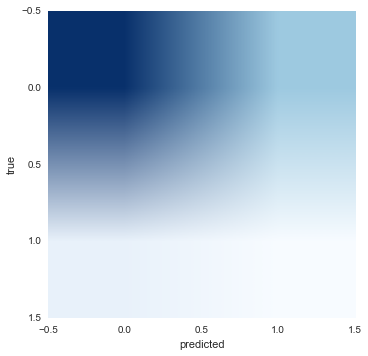

In [225]:
print(confusion_matrix(ytest, ypred))
plt.imshow(np.log(confusion_matrix(ytest, ypred)), cmap="Blues")
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted')

In [226]:
for base in range(0,4,1):
    for point in range(10):
        GPA =  float(str(base) + "." + str(point))
        for seat in range(3):
            seatNum = (seat/2)
            for wtFeel in range(-1,2,1):
                res = cls.predict([GPA, wtFeel, seatNum])
                print(GPA, wtFeel, seatNum, res)

0.0 -1 0.0 [1]
0.0 0 0.0 [1]
0.0 1 0.0 [1]
0.0 -1 0.5 [1]
0.0 0 0.5 [1]
0.0 1 0.5 [1]
0.0 -1 1.0 [1]
0.0 0 1.0 [1]
0.0 1 1.0 [1]
0.1 -1 0.0 [1]
0.1 0 0.0 [1]
0.1 1 0.0 [1]
0.1 -1 0.5 [1]
0.1 0 0.5 [1]
0.1 1 0.5 [1]
0.1 -1 1.0 [1]
0.1 0 1.0 [1]
0.1 1 1.0 [1]
0.2 -1 0.0 [1]
0.2 0 0.0 [1]
0.2 1 0.0 [1]
0.2 -1 0.5 [1]
0.2 0 0.5 [1]
0.2 1 0.5 [1]
0.2 -1 1.0 [1]
0.2 0 1.0 [1]
0.2 1 1.0 [1]
0.3 -1 0.0 [1]
0.3 0 0.0 [1]
0.3 1 0.0 [1]
0.3 -1 0.5 [1]
0.3 0 0.5 [1]
0.3 1 0.5 [1]
0.3 -1 1.0 [1]
0.3 0 1.0 [1]
0.3 1 1.0 [1]
0.4 -1 0.0 [1]
0.4 0 0.0 [1]
0.4 1 0.0 [1]
0.4 -1 0.5 [1]
0.4 0 0.5 [1]
0.4 1 0.5 [1]
0.4 -1 1.0 [1]
0.4 0 1.0 [1]
0.4 1 1.0 [1]
0.5 -1 0.0 [1]
0.5 0 0.0 [1]
0.5 1 0.0 [1]
0.5 -1 0.5 [1]
0.5 0 0.5 [1]
0.5 1 0.5 [1]
0.5 -1 1.0 [1]
0.5 0 1.0 [1]
0.5 1 1.0 [1]
0.6 -1 0.0 [1]
0.6 0 0.0 [1]
0.6 1 0.0 [1]
0.6 -1 0.5 [1]
0.6 0 0.5 [1]
0.6 1 0.5 [1]
0.6 -1 1.0 [1]
0.6 0 1.0 [1]
0.6 1 1.0 [1]
0.7 -1 0.0 [1]
0.7 0 0.0 [1]
0.7 1 0.0 [1]
0.7 -1 0.5 [1]
0.7 0 0.5 [1]
0.7 1 0.5 [1]
0.7 -1 1.0 

# Random Forest

In [236]:
data = BI.as_matrix(columns=["GPA","WtFeelNum","SeatNum"])
target = BI.as_matrix(columns=["GenderNum"])

Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, test_size = 0.3)

cls = RandomForestClassifier()
cls.fit(Xtrain, ytrain.ravel())

result = cls.predict([[3.8, 0, 1]])
print(result)

[1]


In [237]:
ypred = cls.predict(Xtest)
print(classification_report(ytest, ypred))

             precision    recall  f1-score   support

          0       0.74      0.71      0.73        49
          1       0.36      0.40      0.38        20

avg / total       0.63      0.62      0.63        69



[[35 14]
 [12  8]]


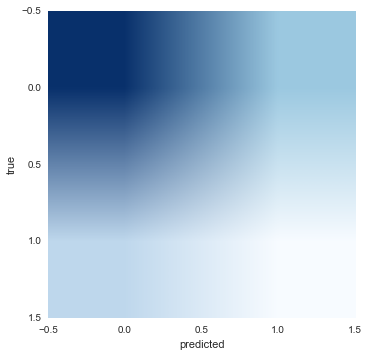

In [239]:
print(confusion_matrix(ytest, ypred))
plt.imshow(np.log(confusion_matrix(ytest, ypred)), cmap="Blues")
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted')

In [240]:
for base in range(0,4,1):
    for point in range(10):
        GPA =  float(str(base) + "." + str(point))
        for seat in range(3):
            seatNum = (seat/2)
            for wtFeel in range(-1,2,1):
                res = cls.predict([GPA, wtFeel, seatNum])
                print(GPA, wtFeel, seatNum, res)


0.0 -1 0.0 [1]
0.0 0 0.0 [1]
0.0 1 0.0 [1]
0.0 -1 0.5 [1]
0.0 0 0.5 [1]
0.0 1 0.5 [1]
0.0 -1 1.0 [0]
0.0 0 1.0 [1]
0.0 1 1.0 [1]
0.1 -1 0.0 [1]
0.1 0 0.0 [1]
0.1 1 0.0 [1]
0.1 -1 0.5 [1]
0.1 0 0.5 [1]
0.1 1 0.5 [1]
0.1 -1 1.0 [0]
0.1 0 1.0 [1]
0.1 1 1.0 [1]
0.2 -1 0.0 [1]
0.2 0 0.0 [1]
0.2 1 0.0 [1]
0.2 -1 0.5 [1]
0.2 0 0.5 [1]
0.2 1 0.5 [1]
0.2 -1 1.0 [0]
0.2 0 1.0 [1]
0.2 1 1.0 [1]
0.3 -1 0.0 [1]
0.3 0 0.0 [1]
0.3 1 0.0 [1]
0.3 -1 0.5 [1]
0.3 0 0.5 [1]
0.3 1 0.5 [1]
0.3 -1 1.0 [0]
0.3 0 1.0 [1]
0.3 1 1.0 [1]
0.4 -1 0.0 [1]
0.4 0 0.0 [1]
0.4 1 0.0 [1]
0.4 -1 0.5 [1]
0.4 0 0.5 [1]
0.4 1 0.5 [1]
0.4 -1 1.0 [0]
0.4 0 1.0 [1]
0.4 1 1.0 [1]
0.5 -1 0.0 [1]
0.5 0 0.0 [1]
0.5 1 0.0 [1]
0.5 -1 0.5 [1]
0.5 0 0.5 [1]
0.5 1 0.5 [1]
0.5 -1 1.0 [0]
0.5 0 1.0 [1]
0.5 1 1.0 [1]
0.6 -1 0.0 [1]
0.6 0 0.0 [1]
0.6 1 0.0 [1]
0.6 -1 0.5 [1]
0.6 0 0.5 [1]
0.6 1 0.5 [1]
0.6 -1 1.0 [0]
0.6 0 1.0 [1]
0.6 1 1.0 [1]
0.7 -1 0.0 [1]
0.7 0 0.0 [1]
0.7 1 0.0 [1]
0.7 -1 0.5 [1]
0.7 0 0.5 [1]
0.7 1 0.5 [1]
0.7 -1 1.0 

In [241]:
BI.head(20)

,Gender,Height,GPA,HS_GPA,Seat,WtFeel,Cheat,SeatNum,WtFeelNum,GenderNum,CheatNum
0,Female,64.0,2.60,2.63,M,AboutRt,No,0.5,0,0,0
1,Male,69.0,2.70,3.72,M,AboutRt,No,0.5,0,1,0
2,Female,66.0,3.00,3.44,F,AboutRt,No,1.0,0,0,0
3,Female,63.0,3.11,2.73,F,AboutRt,No,1.0,0,0,0
4,Male,72.0,3.40,2.35,B,OverWt,No,0.0,1,1,0
5,Female,67.0,3.43,3.84,M,AboutRt,No,0.5,0,0,0
6,Male,69.0,3.70,4.00,F,AboutRt,No,1.0,0,1,0
7,Male,74.0,3.70,3.92,B,AboutRt,No,0.0,0,1,0
8,Male,72.0,3.77,3.09,M,UnderWt,No,0.5,-1,1,0
9,Female,63.0,3.50,4.00,F,AboutRt,No,1.0,0,0,0
